In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.examples.tutorials.mnist.input_data as input_data

## 1、数据准备与预处理

In [2]:
# 利用tf中的工具类加载mnist，也可以用Keras中的
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print("Training data size: ", mnist.train.num_examples) 
print ("Validating data size: ", mnist.validation.num_examples) 
print ("Testing data size: ", mnist.test.num_examples) 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training data size:  55000
Validating data size:  5000
Testing data size:  10000


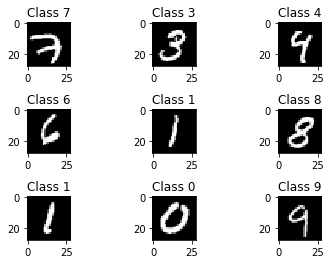

In [3]:
# 用plt看一下前9张图片

plt.figure(facecolor='white')  
plt.subplots_adjust(wspace=0.5, hspace=1)  #调整间距

for i in range(9):
    pic = np.reshape(mnist.train.images[i],(28,28))
    plt.subplot(3,3,i+1)
    plt.imshow(pic, cmap='gray', interpolation='none')
    plt.title("Class {}".format(np.argmax(mnist.train.labels[i])))

In [4]:
x_train = mnist.train.images / 255.
y_train = mnist.train.labels
x_validation = mnist.validation.images / 255.
y_validation = mnist.validation.labels
x_test = mnist.test.images / 255.
y_test = mnist.test.labels

print('x_train.shape =' , x_train.shape)
print('y_train.shape =' , y_train.shape)

x_train.shape = (55000, 784)
y_train.shape = (55000, 10)


## 2、建模


In [5]:
import keras
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop

batch_size = 128

iter_epoch = 20

class_num = 10

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(class_num,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [8]:
cb = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

#真正开始训练
history  = model.fit(x=x_train,y=y_train,
          epochs=iter_epoch,
          batch_size=batch_size,
          verbose=1,
          validation_data=(x_validation,y_validation),
          callbacks=[cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 52us/step - loss: 1.0007 - acc: 0.6920 - val_loss: 0.4514 - val_acc: 0.8770
Epoch 2/20
55000/55000 [==============================] - 3s 47us/step - loss: 0.4169 - acc: 0.8766 - val_loss: 0.3333 - val_acc: 0.8994
Epoch 3/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.3295 - acc: 0.9020 - val_loss: 0.2625 - val_acc: 0.9254
Epoch 4/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.2762 - acc: 0.9184 - val_loss: 0.2217 - val_acc: 0.9352
Epoch 5/20
55000/55000 [==============================] - 3s 47us/step - loss: 0.2348 - acc: 0.9296 - val_loss: 0.1849 - val_acc: 0.9440
Epoch 6/20
55000/55000 [==============================] - 3s 48us/step - loss: 0.2020 - acc: 0.9394 - val_loss: 0.1786 - val_acc: 0.9470
Epoch 7/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.1764 - acc: 0.9462 - val_loss: 0.1430 - val_acc:

## 3、模型测试

In [9]:
score = model.evaluate(x=x_test,y=y_test,verbose=0,batch_size=batch_size)
print('total lost =',score[0])
print('accuracy =',score[1])

total lost = 0.0820147357225
accuracy = 0.9773


In [10]:
print(history)

In [11]:
acc, loss, val_acc, val_loss = history.history['acc'], history.history['loss'], history.history['val_acc'], history.history['val_loss']

In [12]:
print(acc)

[0.69199999997399075, 0.87661818180084228, 0.90200000000866976, 0.9184000000260093, 0.92958181819048791, 0.9394181818615307, 0.94623636367104269, 0.95292727270126343, 0.95694545458013358, 0.96094545457146385, 0.96441818177483296, 0.96647272724671796, 0.96889090904756026, 0.97099999995665121, 0.97356363639831545, 0.97492727274461222, 0.97583636362769388, 0.97727272724671799, 0.97869090904756029, 0.97883636363636362]


In [13]:
print(len(loss))

20


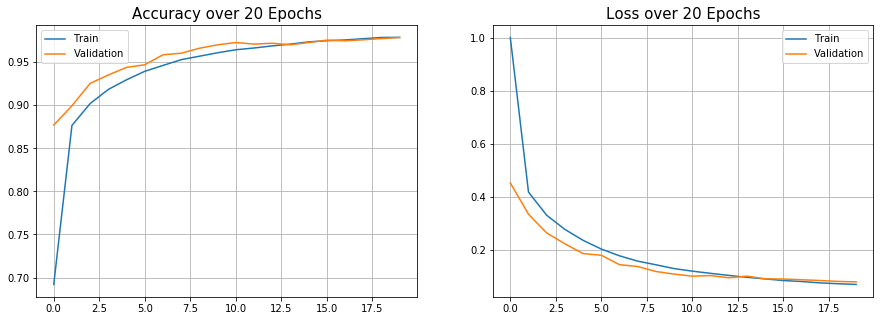

In [15]:
def plot_acc_loss(h, nb_epoch):
    acc, loss, val_acc, val_loss = h.history['acc'], h.history['loss'], h.history['val_acc'], h.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(nb_epoch), acc, label='Train')
    plt.plot(range(nb_epoch), val_acc, label='Validation')
    plt.title('Accuracy over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(nb_epoch), loss, label='Train')
    plt.plot(range(nb_epoch), val_loss, label='Validation')
    plt.title('Loss over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_acc_loss(history,iter_epoch)